In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("archive/heart_2020_cleaned.csv")

# Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


# Data preprocessing

## Handling missing values

In [6]:
sum(df.isna().sum()) + sum(df.isnull().sum())  # no missing values, clear data

0

## Get rid of duplicates

In [7]:
print(df.shape[0] - df.drop_duplicates().shape[0])  # 18078 duplicates to drop
df = df.drop_duplicates()

18078


## Normalization

### prepare 'Diabetic' column

In [8]:
df['Diabetic'] = df.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' else x)
df['Diabetic'] = df.Diabetic.apply(lambda x: 'Yes' if x == 'Yes (during pregnancy)' else x)

### change yes/no columns to 1/0

In [9]:
yes_no = [col for col in df.columns if sorted(list(df[col].unique())) == ['No', 'Yes']]
print(*yes_no, sep=', ')
 
label_encoder = LabelEncoder()
for col in yes_no:
    df[col] = label_encoder.fit_transform(df[col])


HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Diabetic, PhysicalActivity, Asthma, KidneyDisease, SkinCancer


### normalize columns with MinMaxMethod

In [10]:
numerical = ['PhysicalHealth', 'MentalHealth']  # BMI и SleepTime думаю не стоит
for col in numerical:
    # df[col] = df[col] / np.sum(df[col])
    # df[col] = df[col] / np.max(df[col])
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))

In [11]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0.100000,1.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,0.666667,1.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,0.933333,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


# First look

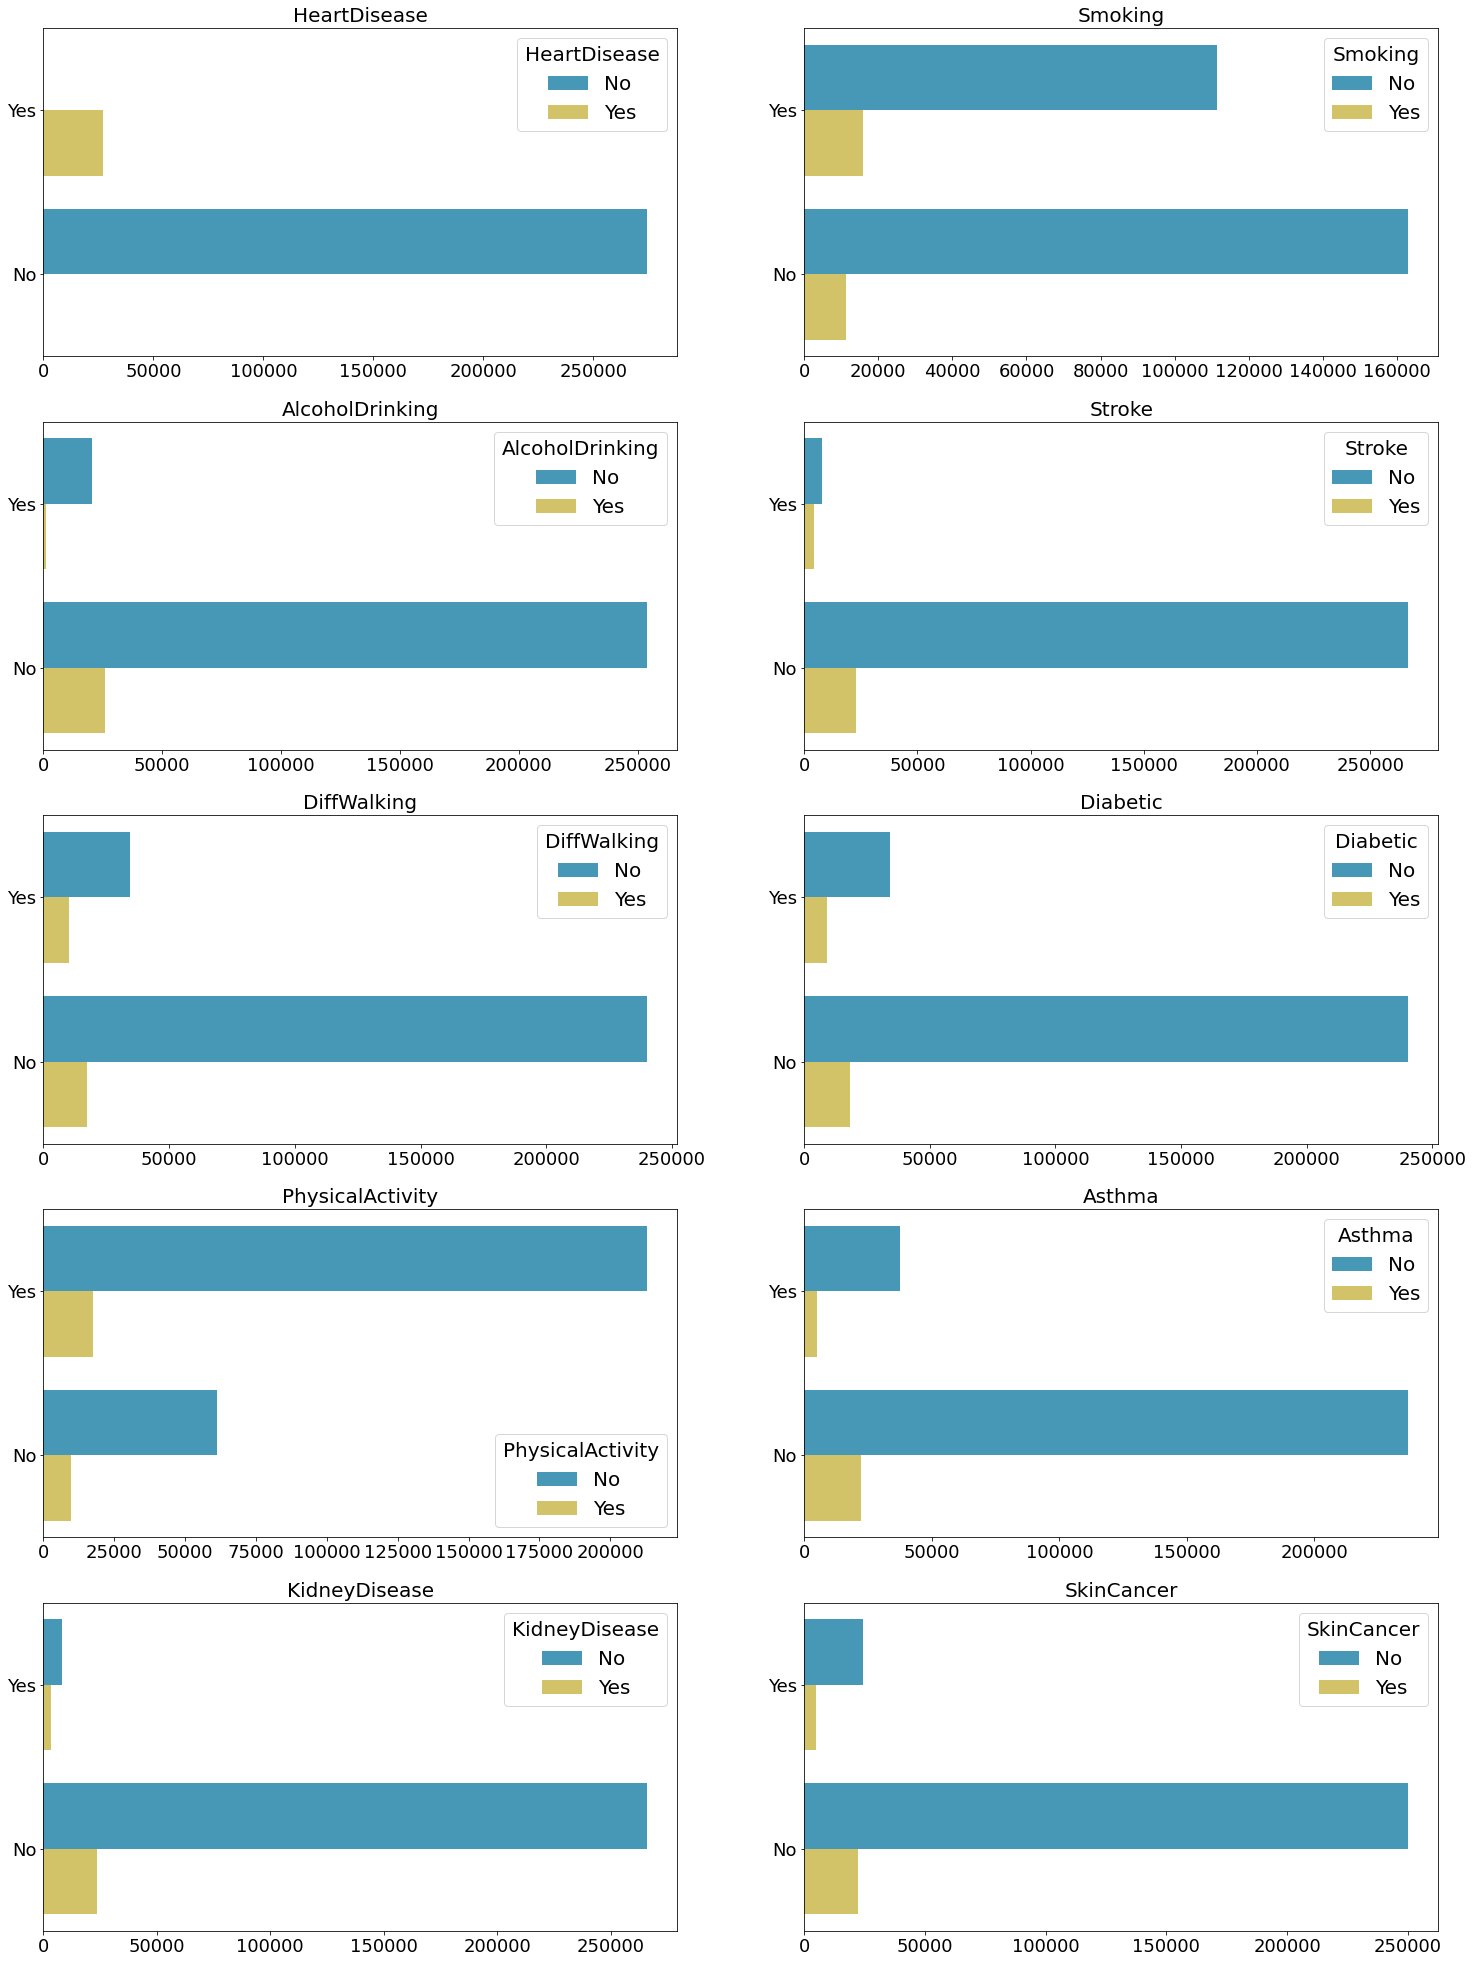

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(25, 35))
idx = 0

for row in range(5):
    for col in range(2):
        sns.countplot(ax = axes[row, col], y = df[yes_no[idx]], hue = df['HeartDisease'], 
                         palette = ['#33A1C9', '#E3CF57'], order=[1, 0]).set(
                         yticklabels = ['Yes', 'No'], ylabel = None, xlabel = None)
        axes[row, col].set_title(yes_no[idx],fontsize=20)
        axes[row, col].tick_params(axis='both', labelsize=18)
        axes[row, col].legend(title=yes_no[idx], fontsize=20, title_fontsize=20, labels=['No', 'Yes'])
        idx += 1

[Text(0.5, 0, '')]

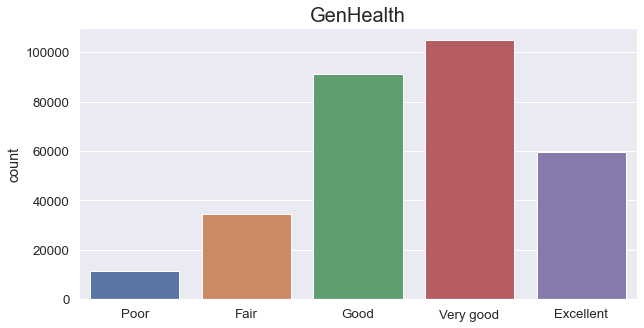

In [34]:
plt.figure(figsize=[10,5]) 
temp = sns.countplot(x=df['GenHealth'], order=('Poor', 'Fair', 'Good', 'Very good', 'Excellent'))
temp.set_title('GenHealth', fontsize=20)
temp.set(xlabel=None)

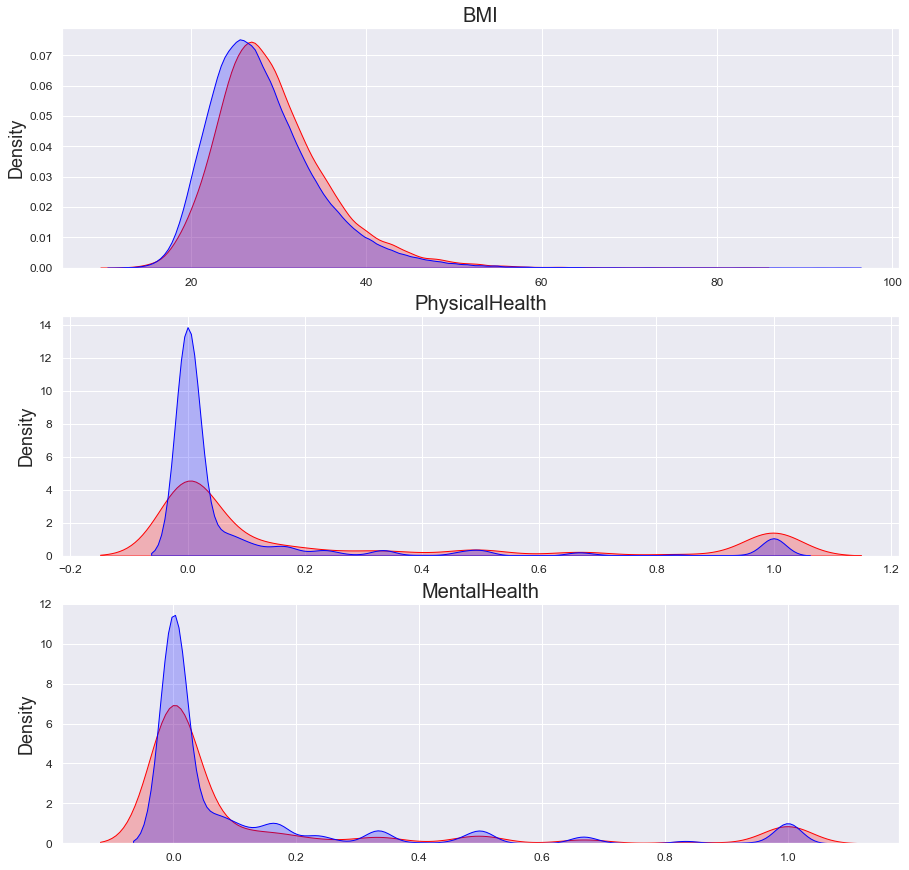

In [14]:
cols = ['BMI', 'PhysicalHealth', 'MentalHealth']
fig, axes = plt.subplots(3, figsize=(15, 15))
idx = 0

for col in cols:
    sns.set(font_scale = 1.5)
    sns.kdeplot(df[df['HeartDisease']==1][col], ax = axes[idx], shade=True,color='red')
    sns.kdeplot(df[df['HeartDisease']==0][col], ax = axes[idx], shade=True,color='blue')
    axes[idx].set_title(cols[idx], fontsize=20)
    axes[idx].tick_params(axis='both', labelsize=12)
    axes[idx].set(xlabel=None)
    idx += 1

[Text(0, 0.5, 'Hours')]

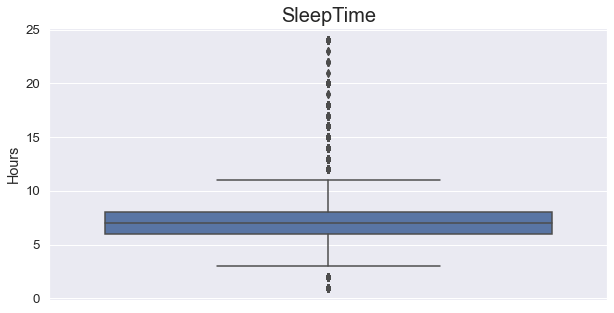

In [35]:
plt.figure(figsize=[10,5]) 
temp = sns.boxplot(y='SleepTime',data=df)
temp.set_title('SleepTime', fontsize=20)
temp.set(ylabel='Hours')

<AxesSubplot:>

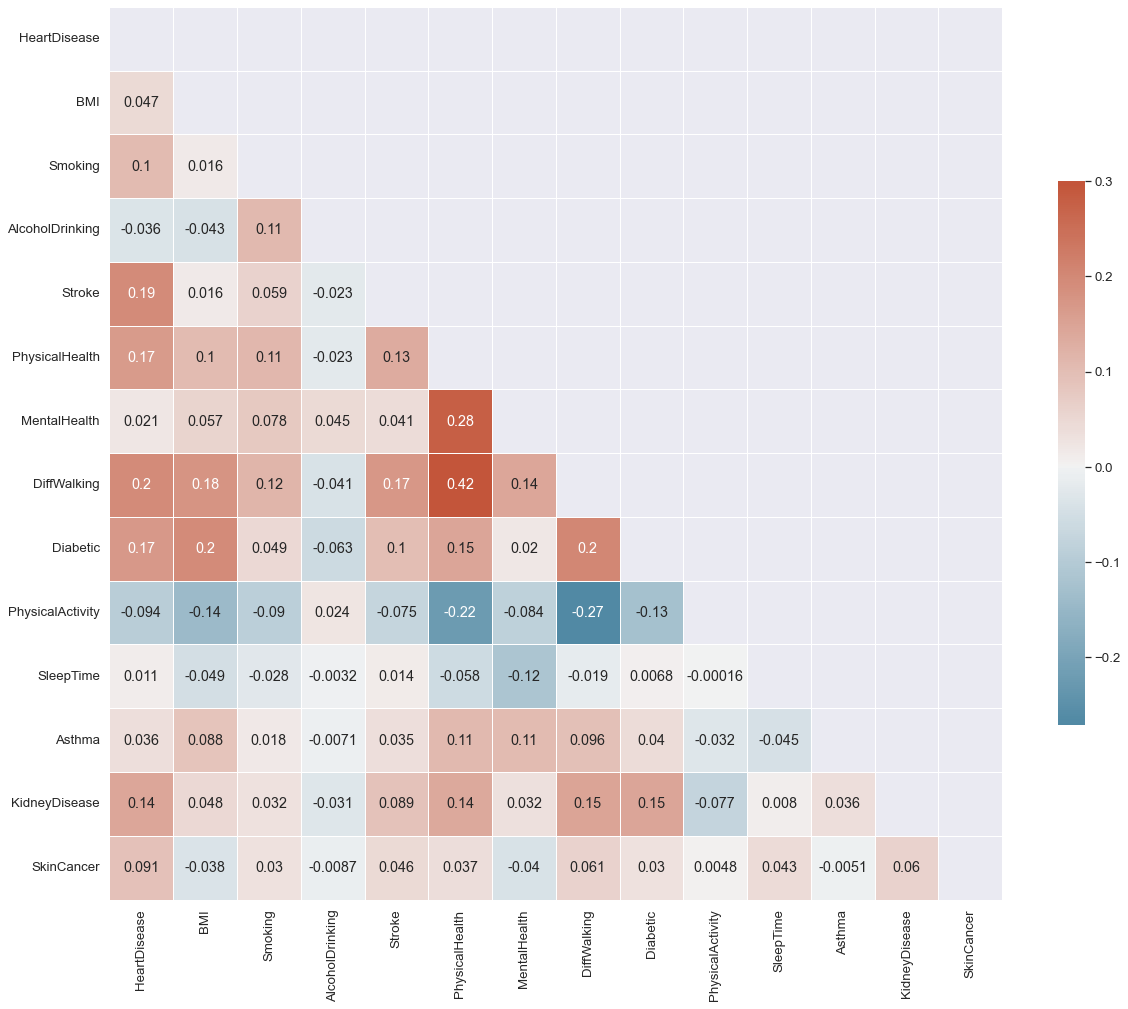

In [93]:
sns.set(font_scale = 1.2)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

[Text(0, 0.5, ''), Text(0.5, 0, '')]

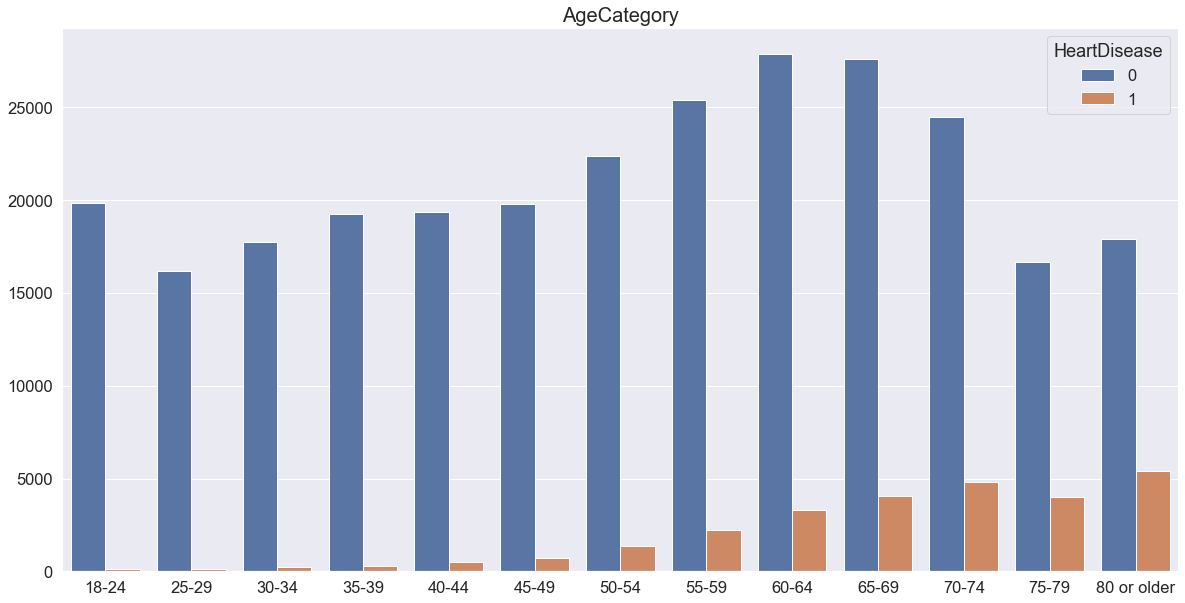

In [96]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 1.5)
temp = sns.countplot(x = df['AgeCategory'], hue = df['HeartDisease'], order = sorted(df['AgeCategory'].unique()))
temp.set_title('AgeCategory', fontsize=20)
temp.set(ylabel=None, xlabel=None)

C:\Users\YanaSolyah\AppData\Local\Temp\ipykernel_9696\741882797.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.append(df[df['HeartDisease'] == 1][df['Race'] == i].count()[0] / df[df['Race'] == i].count()[0])


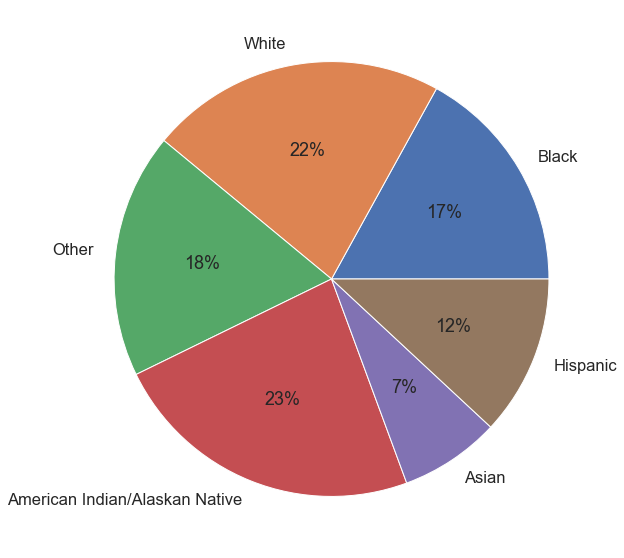

In [130]:
labels = list()
data = list()
for i in df[df['HeartDisease'] == 1]['Race'].unique():
    labels.append(i)
    data.append(df[df['HeartDisease'] == 1][df['Race'] == i].count()[0] / df[df['Race'] == i].count()[0])
    
f, ax = plt.subplots(figsize=(10, 10))
temp = plt.pie(data, labels=labels, autopct='%.0f%%')